In [1]:
!pip install pandas numpy chess matplotlib seaborn scikit-learn


In [3]:
!pip install opencv-python

In [5]:
pip install matplotlib plotly pandas


Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install --upgrade dash


In [8]:
pip install --upgrade mlxtend

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install prefixspan


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade executing


Note: you may need to restart the kernel to use updated packages.


In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [16]:
# Read the ECO to Opening mapping file
eco_data = pd.read_csv(r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\ECO to Open.csv")
eco_data.columns = eco_data.columns.str.strip()  # Clean column names

# Map 'ECO Code' to 'Name' or 'Short Name' based on your preference
eco_mapping = eco_data.set_index('ECO Code')['Name'].to_dict()  # or use 'Short Name'


In [17]:
# Verify scope of eco_mapping and Print check
print("ECO Mapping:", eco_mapping)

ECO Mapping: {'A00': 'Uncommon Opening', 'A01': 'Nimzovich-Larsen Attack', 'A02': "Bird's Opening", 'A03': "Bird's Opening", 'A04': 'Reti Opening', 'A05': 'Reti Opening', 'A06': 'Reti Opening', 'A07': "King's Indian Attack", 'A08': "King's Indian Attack", 'A09': 'Reti Opening', 'A10': 'English', 'A11': 'English, Caro-Kann Defensive System', 'A12': 'English with b3', 'A13': 'English', 'A14': 'English', 'A15': 'English', 'A16': 'English', 'A17': 'English', 'A18': 'English, Mikenas-Carls', 'A19': 'English, Mikenas-Carls, Sicilian Variation', 'A20': 'English', 'A21': 'English', 'A22': 'English', 'A23': 'English, Bremen System, Keres Variation', 'A24': 'English, Bremen System with ...g6', 'A25': 'English', 'A26': 'English', 'A27': 'English, Three Knights System', 'A28': 'English', 'A29': 'English, Four Knights, Kingside Fianchetto', 'A30': 'English, Symmetrical', 'A31': 'English, Symmetrical, Benoni Formation', 'A32': 'English, Symmetrical Variation', 'A33': 'English, Symmetrical', 'A34': '

In [18]:
# Game Data Loading
import os

# Specify the directory path
directory = r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\Imense_Database_For _ChessEnigine"

# List files in the specified directory
files = os.listdir(directory)

print(files)

['1.Tournaments.csv', '1.World_Chess_Champoinship_CSV.csv', 'All_Top_Players_CSV', 'Extracted_All_Top_Players', 'modifyFiles.ipynb', 'processed_1.Tournaments.csv', 'processed_1.World_Chess_Champoinship_CSV.csv', 'processed_processed_1.Tournaments.csv', 'processed_processed_1.World_Chess_Champoinship_CSV.csv', 'processed_processed_processed_1.Tournaments.csv', 'processed_processed_processed_1.World_Chess_Champoinship_CSV.csv', 'processed_processed_processed_processed_1.Tournaments.csv', 'processed_processed_processed_processed_1.World_Chess_Champoinship_CSV.csv', 'processed_processed_processed_processed_processed_1.Tournaments.csv', 'processed_processed_processed_processed_processed_1.World_Chess_Champoinship_CSV.csv', 'processed_processed_processed_processed_processed_processed_1.Tournaments.csv', 'processed_processed_processed_processed_processed_processed_1.World_Chess_Champoinship_CSV.csv', 'Tournaments_CSV', 'World_Chess_Champoinship', 'World_Chess_Champoinship_CSV', '[All_Top_Play

In [23]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\Imense_Database_For _ChessEnigine\1.World_Chess_Champoinship_CSV.csv")

# Transpose the DataFrame (rows become columns and vice versa)
df_transposed = df.T

# Display the transposed DataFrame
print("Transposed DataFrame:")
print(df_transposed)

# Clean the DataFrame by dropping rows with missing values in critical columns
# Specify the subset of columns to check for NaN values
# Adjust the column names based on your data structure
cleaned_df = df_transposed.dropna(subset=['Event', 'Site', 'Date', 'White', 'Black', 'Result', 'ECO'])

# Display the cleaned DataFrame
print("\nCleaned DataFrame (after dropping missing values):")
print(cleaned_df)


Transposed DataFrame:
                                                       0     \
Event                                              FIDE-Wch   
Site                                                NLD/INA   
Date                                             1993.??.??   
Round                                                   1.0   
White                                         Timman, Jan H   
Black                                       Karpov, Anatoly   
Result                                                  0-1   
WhiteElo                                             2620.0   
BlackElo                                             2760.0   
ECO                                                     B17   
Moves     e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...   

                                                       1     \
Event                                              FIDE-Wch   
Site                                                NLD/INA   
Date                            

KeyError: ['Event', 'Site', 'Date', 'White', 'Black', 'Result', 'ECO']

In [25]:
# Import necessary libraries
import os
import pandas as pd

# Initialize a list to hold the game data
game_data = []

# Folder path for tournament files
folder_path = r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\Imense_Database_For _ChessEnigine\World_Chess_Champoinship_CSV"

# Path for ECO openings CSV
eco_openings_path = r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\ECO to Open.csv"

# Load ECO openings data
eco_df = pd.read_csv(eco_openings_path)

# Clean ECO DataFrame column names
eco_df.columns = eco_df.columns.str.strip()  # Remove leading/trailing spaces
print("ECO DataFrame Columns:", eco_df.columns.tolist())  # Check the column names

# Ensure ECO column is the correct name for merging (rename if necessary)
if 'ECO Code' in eco_df.columns:
    eco_df.rename(columns={'ECO Code': 'ECO'}, inplace=True)

# Data Extraction
required_columns = ['White', 'Black', 'ECO', 'Result', 'Moves', 'WhiteElo', 'BlackElo', 'Date']

for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    if file_name.endswith('.csv'):
        try:
            df = pd.read_csv(file_path)
            if all(col in df.columns for col in required_columns):
                for _, row in df[required_columns].iterrows():
                    game_data.append(row.to_dict())
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Convert collected game data into a DataFrame
if game_data:
    data_cleaned = pd.DataFrame(game_data)
    print("Game data collected with columns:", data_cleaned.columns.tolist())

    # Standardize 'ECO' for merging
    data_cleaned['ECO'] = data_cleaned['ECO'].astype(str)
    eco_df['ECO'] = eco_df['ECO'].astype(str)

    # Merge with ECO data to include opening variation information
    merged_data = pd.merge(data_cleaned, eco_df, how='left', on='ECO')
    print("Merged DataFrame created successfully:")
    print(merged_data.head())
else:
    print("No data extracted. Check if files are present in the specified folder.")

# Fill missing values
if 'merged_data' in locals():
    # Fill missing Elo ratings with the column mean
    if 'WhiteElo' in merged_data.columns:
        merged_data['WhiteElo'] = merged_data['WhiteElo'].fillna(merged_data['WhiteElo'].mean())
    if 'BlackElo' in merged_data.columns:
        merged_data['BlackElo'] = merged_data['BlackElo'].fillna(merged_data['BlackElo'].mean())
    
    # Handle 'Date' column, fill missing values with 'Unknown' and extract only the year
    if 'Date' in merged_data.columns:
        merged_data['Date'] = merged_data['Date'].fillna('Unknown')
        merged_data['Year'] = merged_data['Date'].apply(lambda x: x[:4] if x != 'Unknown' else 'Unknown')
    
    # Drop the original 'Date' column if needed
    merged_data = merged_data.drop(columns=['Date'])

    # Display the modified DataFrame
    print("Data after filling missing values:")
    print(merged_data.head())
else:
    print("merged_data is not defined. Please check the data loading and merging steps.")


ECO DataFrame Columns: ['ECO Code', 'Name', 'Short Name']
Game data collected with columns: ['White', 'Black', 'ECO', 'Result', 'Moves', 'WhiteElo', 'BlackElo', 'Date']
Merged DataFrame created successfully:
             White            Black  ECO   Result  \
0    Timman, Jan H  Karpov, Anatoly  B17      0-1   
1  Karpov, Anatoly    Timman, Jan H  E15      0-1   
2    Timman, Jan H  Karpov, Anatoly  B17  1/2-1/2   
3  Karpov, Anatoly    Timman, Jan H  D43  1/2-1/2   
4    Timman, Jan H  Karpov, Anatoly  A29  1/2-1/2   

                                               Moves  WhiteElo  BlackElo  \
0  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
1  d2d4 g8f6 c2c4 e7e6 g1f3 b7b6 g2g3 c8a6 b2b3 f...    2760.0    2620.0   
2  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
3  d2d4 g8f6 c2c4 e7e6 g1f3 d7d5 b1c3 d5c4 d1a4 c...    2760.0    2620.0   
4  c2c4 e7e5 b1c3 g8f6 g1f3 b8c6 g2g3 f8c5 f1g2 e...    2620.0    2760.0   

         Date   

In [27]:
if 'merged_data' in locals():  # Check if merged_data exists
    # Print columns to verify
    print("Merged DataFrame Columns:", merged_data.columns.tolist())

    # Fill missing Elo ratings with the mean of each column
    if 'WhiteElo' in merged_data.columns:
        merged_data['WhiteElo'] = merged_data['WhiteElo'].fillna(merged_data['WhiteElo'].mean())
    if 'BlackElo' in merged_data.columns:
        merged_data['BlackElo'] = merged_data['BlackElo'].fillna(merged_data['BlackElo'].mean())

    # Fill missing or incomplete dates and extract the year
    if 'Date' in merged_data.columns:
        # Fill missing dates with a default value ("Unknown")
        merged_data['Date'] = merged_data['Date'].fillna('Unknown')
        
        # Extract the year where dates are available, otherwise set 'Year' as "Unknown"
        merged_data['Year'] = merged_data['Date'].apply(lambda x: x[:4] if x != 'Unknown' and pd.notnull(x) else 'Unknown')
        
        # Optionally, remove the original 'Date' column after extracting the 'Year'
        merged_data = merged_data.drop(columns=['Date'])

    # Display the DataFrame with filled values
    print("Data after filling missing values and extracting year:")
    print(merged_data.head())
else:
    print("merged_data is not defined. Please check the data loading and merging steps.")


Merged DataFrame Columns: ['White', 'Black', 'ECO', 'Result', 'Moves', 'WhiteElo', 'BlackElo', 'Name', 'Short Name', 'Year']
Data after filling missing values and extracting year:
             White            Black  ECO   Result  \
0    Timman, Jan H  Karpov, Anatoly  B17      0-1   
1  Karpov, Anatoly    Timman, Jan H  E15      0-1   
2    Timman, Jan H  Karpov, Anatoly  B17  1/2-1/2   
3  Karpov, Anatoly    Timman, Jan H  D43  1/2-1/2   
4    Timman, Jan H  Karpov, Anatoly  A29  1/2-1/2   

                                               Moves  WhiteElo  BlackElo  \
0  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
1  d2d4 g8f6 c2c4 e7e6 g1f3 b7b6 g2g3 c8a6 b2b3 f...    2760.0    2620.0   
2  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
3  d2d4 g8f6 c2c4 e7e6 g1f3 d7d5 b1c3 d5c4 d1a4 c...    2760.0    2620.0   
4  c2c4 e7e5 b1c3 g8f6 g1f3 b8c6 g2g3 f8c5 f1g2 e...    2620.0    2760.0   

                                         Nam

In [29]:
if 'merged_data' in locals():  # Check if merged_data exists
    # Print columns to verify
    print("Merged DataFrame Columns:", merged_data.columns.tolist())

    # Flag rows with missing Elo ratings for future analysis
    merged_data['Missing_Elo_Flag'] = merged_data[['WhiteElo', 'BlackElo']].isnull().any(axis=1)

    # Check if 'Date' exists before creating the Incomplete_Date_Flag
    if 'Date' in merged_data.columns:
        merged_data['Incomplete_Date_Flag'] = ~merged_data['Date'].str.match(r'^\d{4}\.\d{2}\.\d{2}$', na=False)
    else:
        merged_data['Incomplete_Date_Flag'] = False  # Default to False if Date is missing

    # Fill missing Elo ratings with the mean of each column
    if 'WhiteElo' in merged_data.columns:
        merged_data['WhiteElo'] = merged_data['WhiteElo'].fillna(merged_data['WhiteElo'].mean())
    if 'BlackElo' in merged_data.columns:
        merged_data['BlackElo'] = merged_data['BlackElo'].fillna(merged_data['BlackElo'].mean())

    # Handle the 'Date' column if it exists
    if 'Date' in merged_data.columns:
        # Fill missing dates with a default value ("Unknown")
        merged_data['Date'] = merged_data['Date'].fillna('Unknown')
        
        # Extract the year where dates are available, otherwise set 'Year' as "Unknown"
        merged_data['Year'] = merged_data['Date'].apply(lambda x: x[:4] if x != 'Unknown' and pd.notnull(x) else 'Unknown')
        
        # Optionally, remove the original 'Date' column after extracting the 'Year'
        merged_data = merged_data.drop(columns=['Date'])

    # Display the DataFrame with flags and filled values
    print("Data with missing flags added and values filled:")
    print(merged_data[['WhiteElo', 'BlackElo', 'Year', 'Missing_Elo_Flag', 'Incomplete_Date_Flag']].head())
else:
    print("merged_data is not defined. Please check the data loading and merging steps.")


Merged DataFrame Columns: ['White', 'Black', 'ECO', 'Result', 'Moves', 'WhiteElo', 'BlackElo', 'Name', 'Short Name', 'Year']
Data with missing flags added and values filled:
   WhiteElo  BlackElo  Year  Missing_Elo_Flag  Incomplete_Date_Flag
0    2620.0    2760.0  1993             False                 False
1    2760.0    2620.0  1993             False                 False
2    2620.0    2760.0  1993             False                 False
3    2760.0    2620.0  1993             False                 False
4    2620.0    2760.0  1993             False                 False


In [31]:
print("Number of games after cleaning:", len(merged_data))


Number of games after cleaning: 5854


          WhiteElo     BlackElo
count  5854.000000  5854.000000
mean   2648.329915  2648.926892
std      81.402186    80.715345
min    2076.000000  2076.000000
25%    2610.000000  2610.000000
50%    2648.329915  2648.926892
75%    2698.000000  2698.000000
max    2870.000000  2870.000000
Unique results: ['0-1' '1/2-1/2' '1-0']


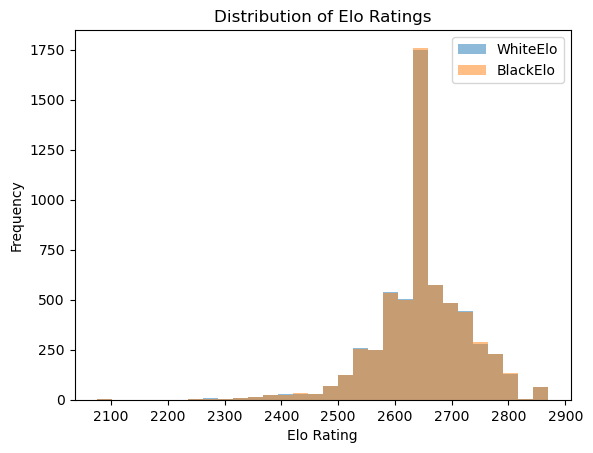

In [33]:
# Summary statistics
print(merged_data.describe())

# Check unique values in the Result column
print("Unique results:", merged_data['Result'].unique())

# Visualize Elo ratings
import matplotlib.pyplot as plt
plt.hist(merged_data['WhiteElo'].dropna(), bins=30, alpha=0.5, label='WhiteElo')
plt.hist(merged_data['BlackElo'].dropna(), bins=30, alpha=0.5, label='BlackElo')
plt.title('Distribution of Elo Ratings')
plt.xlabel('Elo Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [34]:
print("Columns in merged_data:", merged_data.columns)


Columns in merged_data: Index(['White', 'Black', 'ECO', 'Result', 'Moves', 'WhiteElo', 'BlackElo',
       'Name', 'Short Name', 'Year', 'Missing_Elo_Flag',
       'Incomplete_Date_Flag'],
      dtype='object')


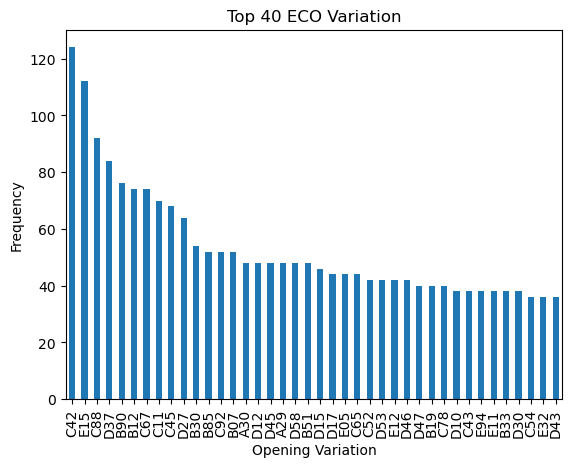

In [37]:
# Analyze Opening Moves, game outcome
opening_counts = merged_data['ECO'].value_counts().head(40)
opening_counts.plot(kind='bar', title='Top 40 ECO Variation')
plt.xlabel('Opening Variation')
plt.ylabel('Frequency')
plt.show()


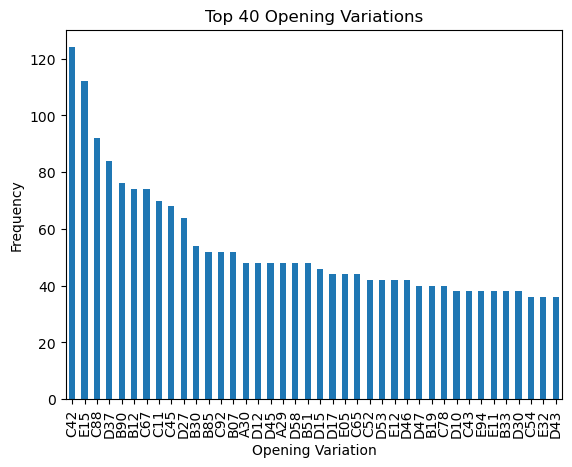

In [39]:
import matplotlib.pyplot as plt

opening_counts = merged_data['ECO'].value_counts().head(40)
opening_counts.plot(kind='bar', title='Top 40 Opening Variations')
plt.xlabel('Opening Variation')
plt.ylabel('Frequency')
plt.show()


In [41]:
import pandas as pd

# Initialize an in-memory data warehouse
data_warehouse = {}

# Assuming merged_data is the cleaned DataFrame
if 'merged_data' in locals():
    data_warehouse['ChessTournamentData'] = merged_data
    print("Data warehouse initialized with the following keys:")
    print(data_warehouse.keys())
    
    for key, df in data_warehouse.items():
        print(f"\nPreview of {key}:")
        print(df.head())
else:
    print("merged_data is not defined. Please check the data loading and merging steps.")


Data warehouse initialized with the following keys:
dict_keys(['ChessTournamentData'])

Preview of ChessTournamentData:
             White            Black  ECO   Result  \
0    Timman, Jan H  Karpov, Anatoly  B17      0-1   
1  Karpov, Anatoly    Timman, Jan H  E15      0-1   
2    Timman, Jan H  Karpov, Anatoly  B17  1/2-1/2   
3  Karpov, Anatoly    Timman, Jan H  D43  1/2-1/2   
4    Timman, Jan H  Karpov, Anatoly  A29  1/2-1/2   

                                               Moves  WhiteElo  BlackElo  \
0  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
1  d2d4 g8f6 c2c4 e7e6 g1f3 b7b6 g2g3 c8a6 b2b3 f...    2760.0    2620.0   
2  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
3  d2d4 g8f6 c2c4 e7e6 g1f3 d7d5 b1c3 d5c4 d1a4 c...    2760.0    2620.0   
4  c2c4 e7e5 b1c3 g8f6 g1f3 b8c6 g2g3 f8c5 f1g2 e...    2620.0    2760.0   

                                         Name               Short Name  Year  \
0               Caro-Kan

In [43]:
import sqlite3

# Define the SQLite database path
db_path = r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\chess_warehousesql1.db"

# Create or connect to the database
conn = sqlite3.connect(db_path)

# Populate the database from the in-memory data warehouse
if 'ChessTournamentData' in data_warehouse:
    data_warehouse['ChessTournamentData'].to_sql('ChessTournamentData', conn, if_exists='replace', index=False)
    print("ChessTournamentData table successfully stored in SQLite database.")
else:
    print("No data found in the warehouse to store in the database.")

conn.close()


ChessTournamentData table successfully stored in SQLite database.


In [45]:
# Confirm Tables, Table Validation, & Preview

import sqlite3
import pandas as pd

# Define the database path
db_path = r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\chess_warehousesql1.db"

# Connect to the database
conn = sqlite3.connect(db_path)

# Query to get available tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

# Print available tables
print("Available Tables:")
print(tables)

# Check if 'ChessTournamentData' exists and preview its data
if 'ChessTournamentData' in tables['name'].values:
    query = "SELECT * FROM ChessTournamentData LIMIT 5;"
    result = pd.read_sql_query(query, conn)
    print("\nPreview of ChessTournamentData from SQLite:")
    print(result)
else:
    print("ChessTournamentData table not found in SQLite database.")

# Close the connection
conn.close()


Available Tables:
                  name
0          ECO to Open
1  ChessTournamentData

Preview of ChessTournamentData from SQLite:
             White            Black  ECO   Result  \
0    Timman, Jan H  Karpov, Anatoly  B17      0-1   
1  Karpov, Anatoly    Timman, Jan H  E15      0-1   
2    Timman, Jan H  Karpov, Anatoly  B17  1/2-1/2   
3  Karpov, Anatoly    Timman, Jan H  D43  1/2-1/2   
4    Timman, Jan H  Karpov, Anatoly  A29  1/2-1/2   

                                               Moves  WhiteElo  BlackElo  \
0  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
1  d2d4 g8f6 c2c4 e7e6 g1f3 b7b6 g2g3 c8a6 b2b3 f...    2760.0    2620.0   
2  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
3  d2d4 g8f6 c2c4 e7e6 g1f3 d7d5 b1c3 d5c4 d1a4 c...    2760.0    2620.0   
4  c2c4 e7e5 b1c3 g8f6 g1f3 b8c6 g2g3 f8c5 f1g2 e...    2620.0    2760.0   

                                         Name               Short Name  Year  \
0           

In [47]:
# Data Warehouse (Central repository for all cleaned data)
import pandas as pd

# Initialize an empty dictionary to act as a data warehouse
data_warehouse = {}

# Assuming merged_data is your cleaned DataFrame from previous steps
if 'merged_data' in locals():
    # Store the cleaned DataFrame in the data warehouse with a meaningful key
    data_warehouse['ChessTournamentData'] = merged_data
    
    # You can also add other DataFrames if necessary
    # Example: data_warehouse['AnotherDataFrame'] = another_dataframe
    
    print("Data warehouse initialized with the following keys:")
    print(data_warehouse.keys())
    
    # To visualize the data stored in the warehouse, you can print the first few rows of each DataFrame
    for key, df in data_warehouse.items():
        print(f"\nData for {key}:")
        print(df.head())
else:
    print("merged_data is not defined. Please check the data loading and merging steps.")


Data warehouse initialized with the following keys:
dict_keys(['ChessTournamentData'])

Data for ChessTournamentData:
             White            Black  ECO   Result  \
0    Timman, Jan H  Karpov, Anatoly  B17      0-1   
1  Karpov, Anatoly    Timman, Jan H  E15      0-1   
2    Timman, Jan H  Karpov, Anatoly  B17  1/2-1/2   
3  Karpov, Anatoly    Timman, Jan H  D43  1/2-1/2   
4    Timman, Jan H  Karpov, Anatoly  A29  1/2-1/2   

                                               Moves  WhiteElo  BlackElo  \
0  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
1  d2d4 g8f6 c2c4 e7e6 g1f3 b7b6 g2g3 c8a6 b2b3 f...    2760.0    2620.0   
2  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
3  d2d4 g8f6 c2c4 e7e6 g1f3 d7d5 b1c3 d5c4 d1a4 c...    2760.0    2620.0   
4  c2c4 e7e5 b1c3 g8f6 g1f3 b8c6 g2g3 f8c5 f1g2 e...    2620.0    2760.0   

                                         Name               Short Name  Year  \
0               Caro-Kann,

In [49]:
import sqlite3

# Define the SQLite database path
db_path = r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\chess_warehousesql1.db"

# Connect to the database
conn = sqlite3.connect(db_path)

# Save data from the data warehouse into SQLite
if 'ChessTournamentData' in data_warehouse:
    data_warehouse['ChessTournamentData'].to_sql('ChessTournamentData', conn, if_exists='replace', index=False)
    print("ChessTournamentData has been stored in SQLite database.")
else:
    print("ChessTournamentData is not available in the data warehouse.")

conn.close()


ChessTournamentData has been stored in SQLite database.


In [51]:
# Adding another DataFrame to the data warehouse
if 'another_dataframe' in locals():
    data_warehouse['AnotherDataFrame'] = another_dataframe
    print("AnotherDataFrame added to the data warehouse.")


In [53]:
# Create a database for data warehouse
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('chess_data_warehousesql.db')
cursor = conn.cursor()


In [55]:
# Initial Validation after data collection into the SQLite database
import sqlite3
import pandas as pd

# Reconnect to the database if not already connected
db_path = r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\chess_data_warehouse.db"
conn = sqlite3.connect(db_path)

# Fetch and preview the first few rows of ChessTournamentData
query = "SELECT * FROM ChessTournamentData LIMIT 5;"
data_preview = pd.read_sql_query(query, conn)

print("Preview of ChessTournamentData:")
print(data_preview)

# Close the connection
conn.close()



Preview of ChessTournamentData:
             White            Black  ECO   Result  \
0    Timman, Jan H  Karpov, Anatoly  B17      0-1   
1  Karpov, Anatoly    Timman, Jan H  E15      0-1   
2    Timman, Jan H  Karpov, Anatoly  B17  1/2-1/2   
3  Karpov, Anatoly    Timman, Jan H  D43  1/2-1/2   
4    Timman, Jan H  Karpov, Anatoly  A29  1/2-1/2   

                                               Moves  WhiteElo  BlackElo  \
0  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
1  d2d4 g8f6 c2c4 e7e6 g1f3 b7b6 g2g3 c8a6 b2b3 f...    2760.0    2620.0   
2  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
3  d2d4 g8f6 c2c4 e7e6 g1f3 d7d5 b1c3 d5c4 d1a4 c...    2760.0    2620.0   
4  c2c4 e7e5 b1c3 g8f6 g1f3 b8c6 g2g3 f8c5 f1g2 e...    2620.0    2760.0   

                                         Name               Short Name  Year  \
0               Caro-Kann, Steinitz Variation                Caro-Kann  1993   
1                              Q

In [57]:
import sqlite3

try:
    # Open a connection to the database
    conn = sqlite3.connect('chess_warehousesql1.db')
    cursor = conn.cursor()

    # Create Games table if it doesn't exist
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Games (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        White TEXT,
        Black TEXT,
        ECO TEXT,
        Result TEXT,
        Moves TEXT,
        WhiteElo INTEGER,
        BlackElo INTEGER,
        Year INTEGER
    )
    ''')

    # Create ECO_Openings table if it doesn't exist
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS ECO_Openings (
        ECO TEXT PRIMARY KEY,
        Name TEXT,
        Short_Name TEXT
    )
    ''')

    # Commit changes to save table creation
    conn.commit()
    print("Tables created successfully.")

except sqlite3.ProgrammingError as e:
    print(f"Programming error occurred: {e}")

except sqlite3.Error as e:
    print(f"Database error occurred: {e}")

finally:
    # Ensure the connection is closed after operations are completed
    if conn:
        conn.commit()
     


Tables created successfully.


In [59]:
# List of columns in merged_data that match the Games table structure
games_columns = ['White', 'Black', 'ECO', 'Result', 'Moves', 'WhiteElo', 'BlackElo', 'Year']

# Insert data from merged_data DataFrame into the Games table, excluding the Name column
merged_data[games_columns].to_sql('Games', conn, if_exists='append', index=False)


5854

In [61]:
import sqlite3

try:
    # Open a connection to the database
    conn = sqlite3.connect('chess_warehousesql1.db')
    cursor = conn.cursor()

    # Create the GameCube data cube as a table or view
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS GameCube AS
    SELECT 
        Year, 
        ECO,
        COUNT(*) AS Game_Count,
        AVG(WhiteElo) AS Avg_WhiteElo,
        AVG(BlackElo) AS Avg_BlackElo
    FROM 
        Games
    GROUP BY 
        Year, ECO
    ''')

    # Commit changes to save the data cube creation
    conn.commit()
    print("GameCube created successfully.")

except sqlite3.ProgrammingError as e:
    print(f"Programming error occurred: {e}")

except sqlite3.Error as e:
    print(f"Database error occurred: {e}")

finally:
    # Ensure the connection is closed after operations are completed
    if conn:
        conn.commit()
        


GameCube created successfully.


In [63]:
cursor.execute('SELECT * FROM GameCube')
data_cube = cursor.fetchall()

# Display the data
for row in data_cube:
    print(row)


(1886, 'C25', 30, 2471.774586894587, 2472.3317657118428)
(1886, 'C47', 30, 2471.774586894587, 2472.3317657118428)
(1886, 'C49', 30, 2471.774586894587, 2472.3317657118428)
(1886, 'C65', 60, 2471.774586894587, 2472.3317657118428)
(1886, 'C67', 180, 2471.7745868945867, 2472.3317657118428)
(1886, 'D10', 60, 2471.774586894587, 2472.3317657118428)
(1886, 'D11', 30, 2471.774586894587, 2472.3317657118428)
(1886, 'D26', 60, 2471.774586894587, 2472.3317657118428)
(1886, 'D40', 30, 2471.774586894587, 2472.3317657118428)
(1886, 'D50', 30, 2471.774586894587, 2472.3317657118428)
(1886, 'D53', 30, 2471.774586894587, 2472.3317657118428)
(1886, 'D60', 30, 2471.774586894587, 2472.3317657118428)
(1889, 'A85', 30, 2471.774586894587, 2472.3317657118428)
(1889, 'C52', 240, 2471.774586894587, 2472.3317657118428)
(1889, 'C62', 30, 2471.774586894587, 2472.3317657118428)
(1889, 'D02', 90, 2471.7745868945867, 2472.3317657118428)
(1889, 'D07', 90, 2471.7745868945867, 2472.3317657118428)
(1889, 'D46', 30, 2471.774

In [65]:
import sqlite3
import dash
from dash import dcc, html
import pandas as pd
import plotly.graph_objects as go

# Connect to the SQLite database
conn = sqlite3.connect('chess_warehousesql1.db')

# Fetch the data for the cube visualization
query = '''
SELECT 
    Year, 
    ECO, 
    COUNT(*) AS Game_Count, 
    AVG(WhiteElo) AS Avg_WhiteElo, 
    AVG(BlackElo) AS Avg_BlackElo 
FROM 
    Games 
GROUP BY 
    Year, ECO
'''
df_cube = pd.read_sql(query, conn)

# Close the database connection after fetching data
conn.close()

# Create your Dash app
app = dash.Dash(__name__)

# Define 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_cube['Year'],  # x-axis = Year
    y=df_cube['ECO'],   # y-axis = ECO Code
    z=df_cube['Game_Count'],  # z-axis = Game Count
    mode='markers',
    marker=dict(
        size=5,
        color=df_cube['Avg_WhiteElo'],  # Color based on Avg_WhiteElo
        colorscale='Viridis',
        colorbar=dict(title='Avg White Elo'),
        opacity=0.8
    ),
    text=[f"Year: {year}<br>ECO: {eco}<br>Games: {count}<br>Avg White Elo: {white_elo}<br>Avg Black Elo: {black_elo}"
          for year, eco, count, white_elo, black_elo in zip(
              df_cube['Year'], df_cube['ECO'], df_cube['Game_Count'], df_cube['Avg_WhiteElo'], df_cube['Avg_BlackElo']
          )]
)])

# Set axis titles and layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Year'),
        yaxis=dict(title='ECO Code'),
        zaxis=dict(title='Game Count')
    ),
    title="3D Chess Data Cube Visualization"
)

# Define your app layout
app.layout = html.Div([
    dcc.Graph(
        id='3d-cube',
        figure=fig  # Pass the figure to display
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [67]:
# Close the connection
conn.close()


In [69]:
# Data Transformation Z-Score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assume merged_data is your DataFrame with Elo ratings and other data
# Select relevant columns (Elo ratings)
columns_to_normalize = ['WhiteElo', 'BlackElo']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data to apply Z-score normalization
merged_data[columns_to_normalize] = scaler.fit_transform(merged_data[columns_to_normalize])

# Print the transformed data
print(merged_data.head())


             White            Black  ECO   Result  \
0    Timman, Jan H  Karpov, Anatoly  B17      0-1   
1  Karpov, Anatoly    Timman, Jan H  E15      0-1   
2    Timman, Jan H  Karpov, Anatoly  B17  1/2-1/2   
3  Karpov, Anatoly    Timman, Jan H  D43  1/2-1/2   
4    Timman, Jan H  Karpov, Anatoly  A29  1/2-1/2   

                                               Moves  WhiteElo  BlackElo  \
0  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g... -0.348054  1.376227   
1  d2d4 g8f6 c2c4 e7e6 g1f3 b7b6 g2g3 c8a6 b2b3 f...  1.371949 -0.358412   
2  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g... -0.348054  1.376227   
3  d2d4 g8f6 c2c4 e7e6 g1f3 d7d5 b1c3 d5c4 d1a4 c...  1.371949 -0.358412   
4  c2c4 e7e5 b1c3 g8f6 g1f3 b8c6 g2g3 f8c5 f1g2 e... -0.348054  1.376227   

                                         Name               Short Name  Year  \
0               Caro-Kann, Steinitz Variation                Caro-Kann  1993   
1                              Queen's Indian           Queen's 

In [79]:
# Chi Squared
import pandas as pd
from scipy.stats import chi2_contingency

# Assume merged_data is your DataFrame with 'ECO' and 'Result' columns
# Create a contingency table for 'ECO' vs 'Result'
contingency_table = pd.crosstab(merged_data['ECO'], merged_data['Result'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpretation: If the p-value is less than 0.05, we reject the null hypothesis (there's a significant relationship)
if p < 0.05:
    print("There is a significant relationship between ECO and Result.")
else:
    print("No significant relationship between ECO and Result.")


Chi-Square Value: 1815.2915836647742
P-Value: 1.9018534249419426e-76
Degrees of Freedom: 824
Expected Frequencies: 
[[1.41031773 2.47898873 4.11069354]
 [0.35257943 0.61974718 1.02767339]
 [0.35257943 0.61974718 1.02767339]
 ...
 [1.0577383  1.85924154 3.08302016]
 [0.35257943 0.61974718 1.02767339]
 [0.35257943 0.61974718 1.02767339]]
There is a significant relationship between ECO and Result.


In [1]:
import sqlite3

# Connect to the database
conn = sqlite3.connect(r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\chess_warehousesql1.db")  # Replace with your database file name

# Query to list all tables
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the list of tables
print("Tables in the database:", tables)

# Close the connection
conn.close()


Tables in the database: [('ECO to Open',), ('ChessTournamentData',)]


In [3]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect(r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\chess_warehousesql1.db")

# Query the ChessTournamentData table to see its schema
query = "PRAGMA table_info('ChessTournamentData');"
schema = pd.read_sql_query(query, conn)
print("Schema of ChessTournamentData:")
print(schema)

# Preview the first few rows of ChessTournamentData
df = pd.read_sql_query("SELECT * FROM ChessTournamentData LIMIT 5;", conn)
print("Preview of ChessTournamentData:")
print(df)

# Close the connection
conn.close()


Schema of ChessTournamentData:
    cid                  name     type  notnull dflt_value  pk
0     0                 White     TEXT        0       None   0
1     1                 Black     TEXT        0       None   0
2     2                   ECO     TEXT        0       None   0
3     3                Result     TEXT        0       None   0
4     4                 Moves     TEXT        0       None   0
5     5              WhiteElo     REAL        0       None   0
6     6              BlackElo     REAL        0       None   0
7     7                  Name     TEXT        0       None   0
8     8            Short Name     TEXT        0       None   0
9     9                  Year     TEXT        0       None   0
10   10      Missing_Elo_Flag  INTEGER        0       None   0
11   11  Incomplete_Date_Flag  INTEGER        0       None   0
Preview of ChessTournamentData:
             White            Black  ECO   Result  \
0    Timman, Jan H  Karpov, Anatoly  B17      0-1   
1  Karpov, A

In [5]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect(r"C:\Users\cosmi\OneDrive\Chess Algorithms Project\chess_warehousesql1.db")

# Query the ChessTournamentData table
query = """
SELECT 
    White, Black, ECO, Result, Moves, WhiteElo, BlackElo, Name, Year
FROM 
    ChessTournamentData
"""
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Verify the data
print(df.head())


             White            Black  ECO   Result  \
0    Timman, Jan H  Karpov, Anatoly  B17      0-1   
1  Karpov, Anatoly    Timman, Jan H  E15      0-1   
2    Timman, Jan H  Karpov, Anatoly  B17  1/2-1/2   
3  Karpov, Anatoly    Timman, Jan H  D43  1/2-1/2   
4    Timman, Jan H  Karpov, Anatoly  A29  1/2-1/2   

                                               Moves  WhiteElo  BlackElo  \
0  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
1  d2d4 g8f6 c2c4 e7e6 g1f3 b7b6 g2g3 c8a6 b2b3 f...    2760.0    2620.0   
2  e2e4 c7c6 d2d4 d7d5 b1d2 d5e4 d2e4 b8d7 f1c4 g...    2620.0    2760.0   
3  d2d4 g8f6 c2c4 e7e6 g1f3 d7d5 b1c3 d5c4 d1a4 c...    2760.0    2620.0   
4  c2c4 e7e5 b1c3 g8f6 g1f3 b8c6 g2g3 f8c5 f1g2 e...    2620.0    2760.0   

                                         Name  Year  
0               Caro-Kann, Steinitz Variation  1993  
1                              Queen's Indian  1993  
2               Caro-Kann, Steinitz Variation  1993  
3       

In [7]:
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(df['Name'], df['Result'])
print(contingency_table)


Result                        0-1  1-0  1/2-1/2
Name                                           
Alekhine's Defense              2    0        0
Alekhine's Defense, Modern      4    2       14
Benko Gambit                    2    8        6
Benoni                          0    0        2
Benoni Defense                  0    2        2
...                           ...  ...      ...
Two Knights Defense             2    4        4
Uncommon King's Pawn Opening    0    0        2
Uncommon Opening                6    2        0
Vienna                          2    6        4
Vienna Game                     0    4        0

[245 rows x 3 columns]


In [9]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Value: 1160.856421104985
P-Value: 9.726634317811158e-57
Degrees of Freedom: 488


In [12]:
# Define the threshold based on residual statistics
threshold = 5  # You can adjust this based on your analysis

# Filter rows where the maximum absolute residual across results exceeds the threshold
significant_opening = residuals_df[residuals_df.abs().max(axis=1) > threshold]

print("Significant Openings based on Residuals:")
print(significant_openings)


NameError: name 'residuals_df' is not defined

In [14]:
# Get absolute counts
counts = df.groupby(['Name', 'Result']).size().reset_index(name='Count')
print(counts)


                           Name   Result  Count
0            Alekhine's Defense      0-1      2
1    Alekhine's Defense, Modern      0-1      4
2    Alekhine's Defense, Modern      1-0      2
3    Alekhine's Defense, Modern  1/2-1/2     14
4                  Benko Gambit      0-1      2
..                          ...      ...    ...
539            Uncommon Opening      1-0      2
540                      Vienna      0-1      2
541                      Vienna      1-0      6
542                      Vienna  1/2-1/2      4
543                 Vienna Game      1-0      4

[544 rows x 3 columns]


In [16]:
# Calculate support for each significant pattern
total_games = len(df)
counts['Support'] = counts['Count'] / total_games

# Use minimum support threshold for FP-tree
min_support = counts['Support'].min()  # Set to lowest support from chi-square significant patterns
print(f"Minimum Support for FP-tree: {min_support}")


Minimum Support for FP-tree: 0.00034164673727365904


In [18]:
from mlxtend.frequent_patterns import fpgrowth

# Convert data to transactional format
transactions = df[['Name', 'Result']].astype(str).values.tolist()

# Convert to one-hot encoded DataFrame
one_hot_df = pd.get_dummies(df[['Name', 'Result']])

# Run FP-tree
fp_results = fpgrowth(one_hot_df, min_support=min_support, use_colnames=True)
print(fp_results)


      support                                           itemsets
0    0.176290                                       (Result_0-1)
1    0.005466               (Name_Caro-Kann, Steinitz Variation)
2    0.036556                              (Name_Queen's Indian)
3    0.513837                                   (Result_1/2-1/2)
4    0.029382           (Name_Queen's Gambit Declined Semi-Slav)
..        ...                                                ...
787  0.000342  (Name_Nimzo-Indian, 4.e3 O-O 5.Bd3, Result_1/2...
788  0.000342    (Name_Nimzo-Indian, 4.e3 O-O 5.Bd3, Result_0-1)
789  0.000342             (Result_1/2-1/2, Name_Grunfeld, 5.Bf4)
790  0.000342  (Name_Grunfeld, Spassky Variation, Main line, ...
791  0.000342    (Name_Benoni, Classical, 9.O-O, Result_1/2-1/2)

[792 rows x 2 columns]


In [20]:
from mlxtend.frequent_patterns import fpgrowth
import pandas as pd

# Convert data to transactional format
df['Transaction'] = df['Name'] + '_' + df['Result']  # Combine 'Name' and 'Result'
transactions = df['Transaction'].astype(str).values.tolist()

# Convert to one-hot encoded DataFrame
one_hot_df = pd.get_dummies(df[['Name', 'Result']])

# Run FP-tree
fp_results = fpgrowth(one_hot_df, min_support=min_support, use_colnames=True)

# Add support percentage
fp_results['support_percentage'] = fp_results['support'] * 100

# Filter for patterns associated with winning (e.g., "1-0")
winning_patterns = fp_results[fp_results['itemsets'].apply(lambda x: any('1-0' in i for i in x))]

# Display Winning Patterns
print("Winning Patterns with Frequencies and Percentages:")
print(winning_patterns.sort_values(by='support', ascending=False))

# Calculate top openings and their win rates
df['Win'] = df['Result'].apply(lambda x: 1 if x == '1-0' else 0)  # Mark wins for White
opening_win_rates = df.groupby('Name')['Win'].mean().sort_values(ascending=False) * 100
print("\nTop Openings by Win Rate (White):")
print(opening_win_rates.head(10))

# (Optional) Abstract smaller dataset with high win-rate openings
top_openings = opening_win_rates.head(10).index
abstracted_data = df[df['Name'].isin(top_openings)]
print("\nAbstracted Smaller Dataset for Relevant High-Win Openings:")
print(abstracted_data.head())


Winning Patterns with Frequencies and Percentages:
      support                                           itemsets  \
6    0.309874                                       (Result_1-0)   
398  0.016057         (Result_1-0, Name_Queen's Gambit Declined)   
344  0.014008                       (Name_Ruy Lopez, Result_1-0)   
355  0.011274                        (Name_Sicilian, Result_1-0)   
360  0.010933    (Result_1-0, Name_Queen's Gambit Declined Slav)   
..        ...                                                ...   
404  0.000342  (Name_English, Caro-Kann Defensive System, Res...   
596  0.000342  (Name_Dutch, Leningrad, Main Variation with c6...   
703  0.000342  (Result_1-0, Name_Torre Attack (Tartakower Var...   
704  0.000342  (Result_1-0, Name_Queen's Gambit Declined, Alb...   
784  0.000342  (Name_English, Symmetrical, Main line with d4,...   

     support_percentage  
6             30.987359  
398            1.605740  
344            1.400752  
355            1.127434  
36

C:\Users\cosmi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\cosmi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\cosmi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\cosmi\AppData\Local\Temp\ipykernel_26612\4210074382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Result', y='WhiteElo', palette='Set2')


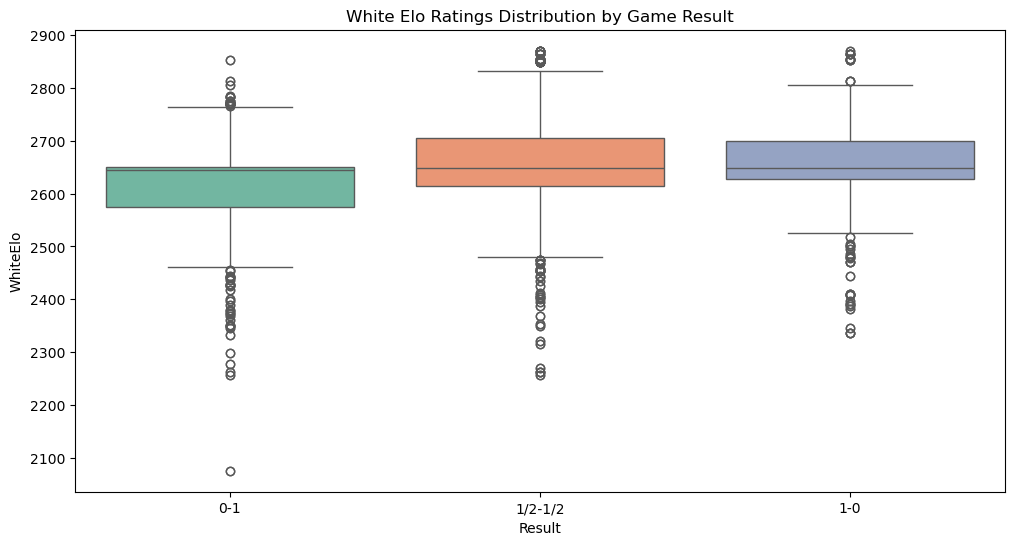

C:\Users\cosmi\AppData\Local\Temp\ipykernel_26612\4210074382.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Result', y='BlackElo', palette='Set2')


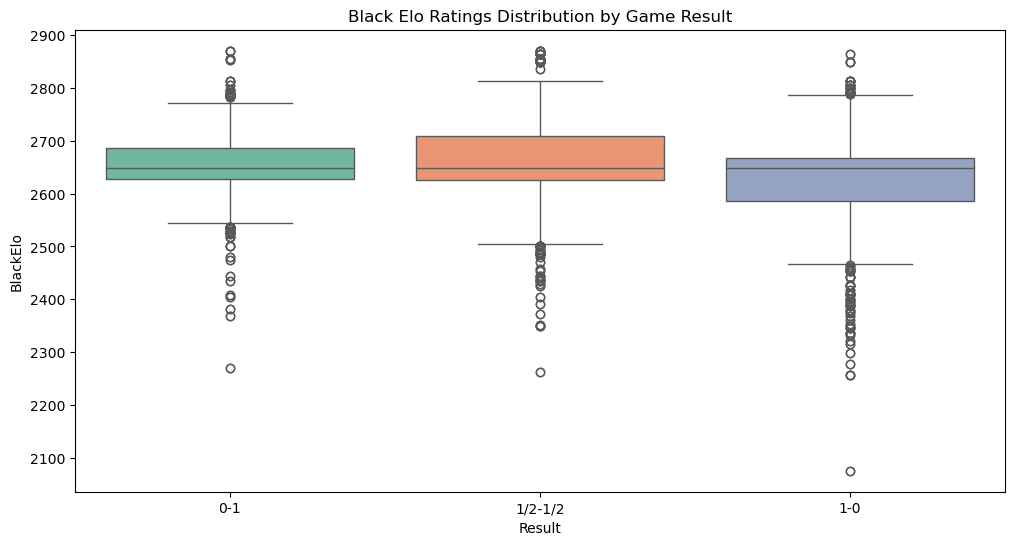

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for WhiteElo and BlackElo grouped by result
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Result', y='WhiteElo', palette='Set2')
plt.title('White Elo Ratings Distribution by Game Result')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Result', y='BlackElo', palette='Set2')
plt.title('Black Elo Ratings Distribution by Game Result')
plt.show()


C:\Users\cosmi\AppData\Local\Temp\ipykernel_26612\1113502563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings.values, y=top_openings.index, palette='viridis')


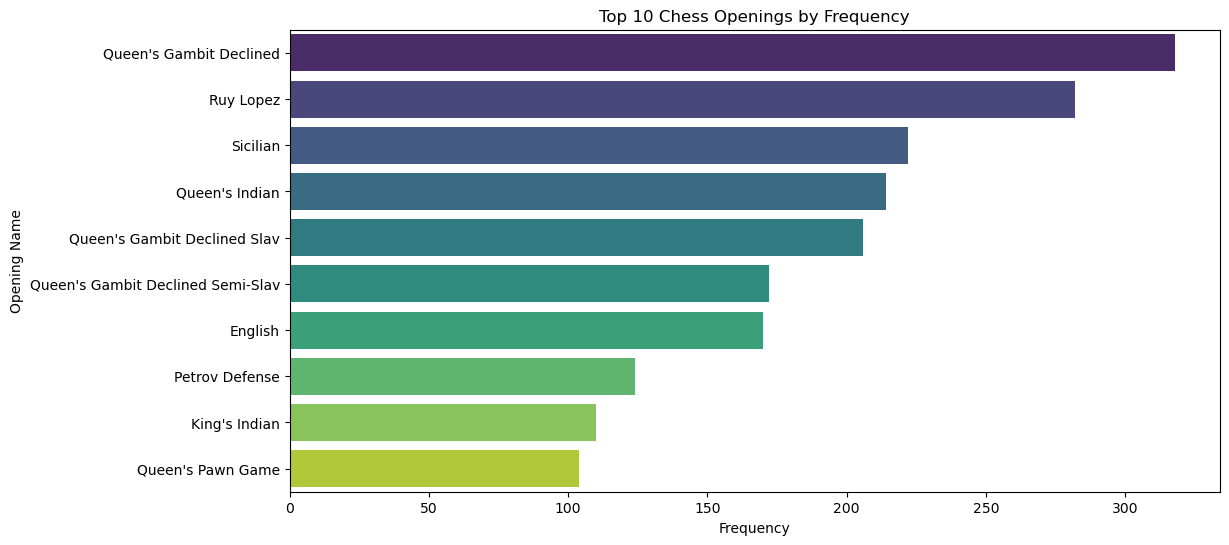

In [26]:
# Bar plot for top 10 openings
top_openings = df['Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_openings.values, y=top_openings.index, palette='viridis')
plt.title('Top 10 Chess Openings by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Opening Name')
plt.show()

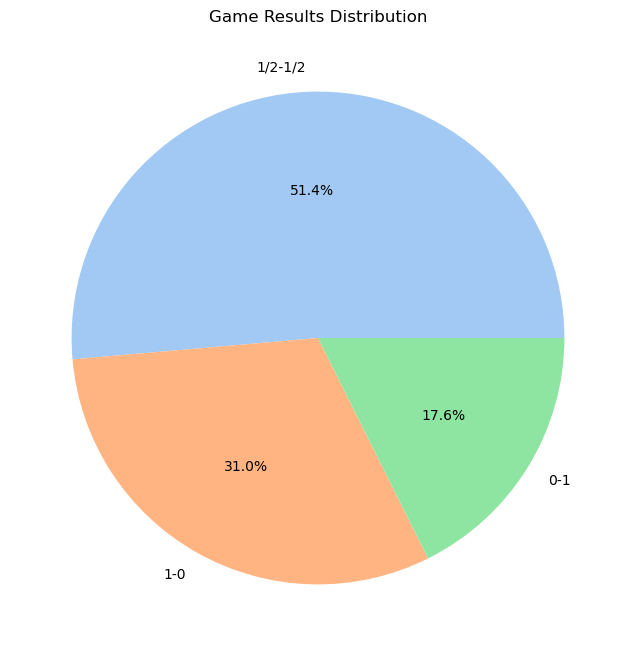

In [45]:
# Pie chart of game results
result_counts = df['Result'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Game Results Distribution')
plt.show()


In [49]:
print(fp_results)


Empty DataFrame
Columns: [Name, Result, Count, Support, support, itemsets]
Index: []


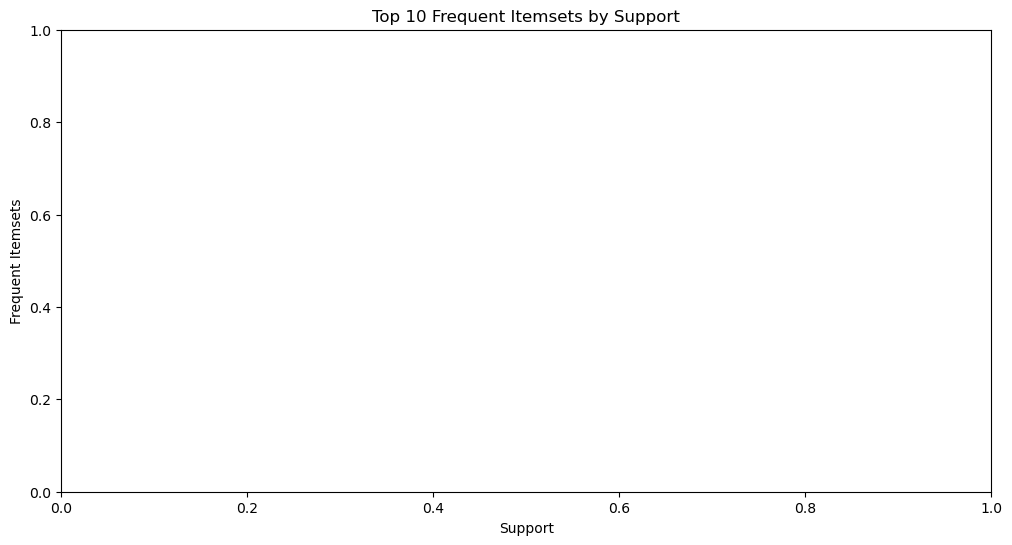

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and select top 10 frequent itemsets by support
top_fp_results = fp_results.sort_values(by='support', ascending=False).head(10)

# Convert itemsets to strings for better readability
top_fp_results['itemsets'] = top_fp_results['itemsets'].apply(lambda x: ', '.join(x) if isinstance(x, (list, set)) else str(x))

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=top_fp_results, x='support', y='itemsets', palette='Blues_r')
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Frequent Itemsets')
plt.show()


In [55]:
# Filter for itemsets containing specific results
result_specific_fp = fp_results[fp_results['itemsets'].apply(lambda x: 'Result_1-0' in x)]

# Sort by support and visualize
result_specific_fp = result_specific_fp.sort_values(by='support', ascending=False).head(10)
result_specific_fp['itemsets'] = result_specific_fp['itemsets'].apply(lambda x: ', '.join(x))

# Plot result-specific patterns
plt.figure(figsize=(12, 6))
sns.barplot(data=result_specific_fp, x='support', y='itemsets', palette='Oranges_r')
plt.title('Frequent Itemsets with Result 1-0')
plt.xlabel('Support')
plt.ylabel('Frequent Itemsets')
plt.show()


KeyError: 'support'

In [ ]:
# Example of transforming data into transactional format
transactions = df[['Opening Variation', 'Result']].astype(str).values.tolist()


In [ ]:
# Example of binning Elo ratings
bins = [2000, 2500, 2700, 2900]
labels = ['Low Elo', 'Mid Elo', 'High Elo']
df['WhiteEloRange'] = pd.cut(df['WhiteElo'], bins=bins, labels=labels)


In [ ]:
# Chi-square significant results
chi_square_results = {
    "Sicilian Defense": {"1-0": 150, "0-1": 100, "Draw": 50},
    "Queen's Gambit": {"1-0": 200, "0-1": 80, "Draw": 70}
}

# FP-tree patterns
fp_results = [
    {"Pattern": "Sicilian Defense (1-0)", "Support": 0.15},
    {"Pattern": "Queen's Gambit (1-0)", "Support": 0.12},
]


In [ ]:
from prefixspan import PrefixSpan

# Tokenize the 'Moves' column into sequences, handling missing values
sequences = (
    df['Moves']  # Use the 'Moves' column
    .dropna()  # Remove any rows where 'Moves' is NaN
    .apply(lambda x: x.split())  # Split strings into lists of moves
    .tolist()
)

# Initialize PrefixSpan
ps = PrefixSpan(sequences)

# Different support thresholds
support_thresholds = [5, 0.1, 0.01, 0.001]

print("Frequent Patterns for Different Support Thresholds:")
for support in support_thresholds:
    print(f"\nSupport Threshold: {support}")
    
    try:
        frequent_patterns = ps.frequent(support)  # Mine patterns
        if frequent_patterns:
            for pattern, support_value in frequent_patterns[:5]:  # Display top 5 patterns
                print(f"Pattern: {pattern}, Support: {support_value}")
        else:
            print("No patterns found.")
    except Exception as e:
        print(f"Error occurred for support {support}: {e}")


In [ ]:
from prefixspan import PrefixSpan

# Tokenize the 'Moves' column into sequences, handling missing values
sequences = (
    df['Moves']  # Use the 'Moves' column
    .dropna()  # Remove any rows where 'Moves' is NaN
    .apply(lambda x: x.split())  # Split strings into lists of moves
    .tolist()
)

# Initialize PrefixSpan
ps = PrefixSpan(sequences)

# Different support thresholds
support_thresholds = [5, 0.1, 0.01, 0.001]

print("Frequent Patterns for Different Support Thresholds:")
for support in support_thresholds:
    print(f"\nSupport Threshold: {support}")
    
    try:
        frequent_patterns = ps.frequent(support)  # Mine patterns
        if frequent_patterns:
            for pattern, support_value in frequent_patterns[:5]:  # Display top 5 patterns
                print(f"Pattern: {pattern}, Support: {support_value}")
        else:
            print("No patterns found.")
    except Exception as e:
        print(f"Error occurred for support {support}: {e}")


In [ ]:
import pandas as pd

# Load Data
df = pd.read_csv('chess_tournament_data.csv')

# Display basic information
print(df.info())

# Handle missing values
df['Moves'].fillna('', inplace=True)
df['Name'].fillna('Unknown', inplace=True)

# Convert necessary columns to appropriate types
df['Year'] = df['Year'].astype(str)
df['WhiteElo'] = pd.to_numeric(df['WhiteElo'], errors='coerce')
df['BlackElo'] = pd.to_numeric(df['BlackElo'], errors='coerce')


In [ ]:
top_patterns = ps.topk(10)  # Get the top 10 patterns
print("Top Patterns:")
for pattern, support in top_patterns:
    print(f"Pattern: {pattern}, Support: {support}")


In [1]:
# Import libraries for FP - Growth
import pandas as pd
import sqlite3
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [2]:
import sqlite3

# Database path
source_db = r"D:\Chess Algorithms Project\chess_warehousesql1.db"

# Connect to the source database and list all tables
with sqlite3.connect(source_db) as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print("Available tables in the source database:", tables)


Available tables in the source database: [('ECO to Open',), ('ChessTournamentData',)]


In [5]:
connection = sqlite3.connect(r"D:\Chess Algorithms Project\chess_warehousesql1.db")


In [7]:
import pandas as pd
import sqlite3
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import os

# Step 1: Database Connection
db_path = r"D:\Chess Algorithms Project\chess_warehousesql1.db"  # Database path
output_dir = r"D:\Chess Algorithms Project\processed_batches"  # Output folder
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# Establish connection
connection = sqlite3.connect(db_path)

# Step 2: Batch Processing Parameters
batch_size = 10000
offset = 0

# Step 3: Process Data in Batches
while True:
    # Fetch batch of data
    query = f"SELECT ECO FROM ChessTournamentData LIMIT {batch_size} OFFSET {offset}"
    batch_data = pd.read_sql(query, connection)
    
    # Stop when no more data is available
    if batch_data.empty:
        break

    # Preprocess ECO column into a list of transactions
    transactions = batch_data['ECO'].tolist()
    transactions = [[code] for code in transactions]  # Each row as a list of ECO codes

    # Convert to one-hot encoded format using TransactionEncoder
    te = TransactionEncoder()
    one_hot_encoded = te.fit(transactions).transform(transactions)
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=te.columns_)

    # Perform FP-Growth on this batch
    batch_frequent_itemsets = fpgrowth(one_hot_df, min_support=0.01, use_colnames=True)
    
    # Append or process results
    if not batch_frequent_itemsets.empty:
        print(batch_frequent_itemsets.head())  # Or save results for later aggregation

    offset += batch_size

# Close the connection
connection.close()


    support itemsets
0  0.019132    (E15)
1  0.012641    (B12)
2  0.012641    (C67)
3  0.011616    (C45)
4  0.011958    (C11)


In [9]:
output_file = os.path.join(output_dir, f"batch_{offset}.csv")
batch_frequent_itemsets.to_csv(output_file, index=False)


In [ ]:
#batch_size = 10000
#for i in range(0, len(chess_data), batch_size):
    #batch = chess_data.iloc[i:i + batch_size]
    
    # Perform FP-Growth on this batch
    #batch_frequent_itemsets = fpgrowth(batch, min_support=0.01, use_colnames=True)
    
    # Process or store batch results
    #print(batch_frequent_itemsets.head())


In [11]:
import pandas as pd
import os

# Directory where batch files are saved
output_dir = r"D:\Chess Algorithms Project\processed_batches"

# Combine all batch files into a single DataFrame
all_batches = []
for file in os.listdir(output_dir):
    if file.startswith("encoded_batch") and file.endswith(".csv"):
        file_path = os.path.join(output_dir, file)
        df = pd.read_csv(file_path)
        all_batches.append(df)

# Concatenate all batches into a single DataFrame
combined_df = pd.concat(all_batches, ignore_index=True)

print("Combined DataFrame created:")
print(combined_df.head())


Combined DataFrame created:
     A00    A01    A03    A04    A05    A06   A07   A08    A09    A10  ...  \
0   True  False  False  False  False   True  True  True  False   True  ...   
1   True  False   True   True  False   True  True  True   True  False  ...   
2  False   True  False   True   True  False  True  True   True   True  ...   

     E89   E90   E91   E92   E94    E95   E97    E98    E99    nan  
0  False  True  True  True  True   True  True  False  False   True  
1  False  True  True  True  True  False  True   True   True  False  
2   True  True  True  True  True  False  True   True  False  False  

[3 rows x 413 columns]


In [13]:
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 413 entries, A00 to nan
dtypes: bool(413)
memory usage: 1.3 KB
None


In [15]:
print(f"Total rows in combined_df: {combined_df.shape[0]}")


Total rows in combined_df: 3


In [17]:
print(combined_df.shape)


(3, 413)


In [19]:
# Verify data types
print(combined_df.dtypes)


A00    bool
A01    bool
A03    bool
A04    bool
A05    bool
       ... 
E95    bool
E97    bool
E98    bool
E99    bool
nan    bool
Length: 413, dtype: object


In [21]:
# Checking for missing values in data 
print(combined_df.isnull().sum())


A00    0
A01    0
A03    0
A04    0
A05    0
      ..
E95    0
E97    0
E98    0
E99    0
nan    0
Length: 413, dtype: int64


In [ ]:
print(combined_df.head())
print(combined_df.info())


In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Step 1: Check the dataset
print(combined_df.shape)  # (rows, columns)
print(combined_df.head())  # Display initial rows
print(combined_df.isnull().sum())  # Check for missing values

# Step 2: Apply FP-Growth
frequent_itemsets = fpgrowth(combined_df, min_support=0.005, use_colnames=True)

# Step 3: Check if any frequent itemsets are found
if not frequent_itemsets.empty:
    print("Frequent Itemsets Found:")
    print(frequent_itemsets.head())
    
    # Step 4: Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    print("Association Rules:")
    print(rules.head())
    
    # Step 5: Filter significant rules
    significant_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 1.2)]
    print("Significant Association Rules:")
    print(significant_rules)
else:
    print("No frequent itemsets found; cannot generate rules.")


In [ ]:
frequent_itemsets = fpgrowth(combined_df, min_support=0.005, use_colnames=True)
print(f"Total frequent itemsets found: {len(frequent_itemsets)}")
print(frequent_itemsets.head())


In [ ]:
single_itemsets = frequent_itemsets[frequent_itemsets['length'] == 1]
double_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]
triple_itemsets = frequent_itemsets[frequent_itemsets['length'] == 3]

print(f"Single Itemsets Found: {len(single_itemsets)}")
print(f"Double Itemsets Found: {len(double_itemsets)}")
print(f"Triple Itemsets Found: {len(triple_itemsets)}")


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules.head())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap for frequent itemsets
sns.heatmap(frequent_itemsets.iloc[:, :-2], cmap="coolwarm")
plt.show()


In [ ]:
print(combined_df.head())
print(combined_df.info())


In [ ]:
("Frequent Itemsets Summary:")
print(f"Total itemsets found: {len(frequent_itemsets)}")
print(frequprintent_itemsets.head())


In [ ]:
print(f"Frequent Itemsets DataFrame Shape: {frequent_itemsets.shape}")
print(frequent_itemsets.head())


In [ ]:
# Step 4: Analyze Single, Double, and Triple Itemsets

# Filter single, double, and triple itemsets
single_itemsets = frequent_itemsets[frequent_itemsets['length'] == 1]
double_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]
triple_itemsets = frequent_itemsets[frequent_itemsets['length'] == 3]

# Print counts for each category
print(f"Single Itemsets Found: {len(single_itemsets)}")
print(f"Double Itemsets Found: {len(double_itemsets)}")
print(f"Triple Itemsets Found: {len(triple_itemsets)}")

# Print Single Itemsets
if single_itemsets.empty:
    print("No single itemsets found.")
else:
    print("\nSingle Itemsets:")
    print(single_itemsets)

# Print Double Itemsets
if double_itemsets.empty:
    print("\nNo double itemsets found.")
else:
    print("\nDouble Itemsets:")
    print(double_itemsets)

# Print Triple Itemsets
if triple_itemsets.empty:
    print("\nNo triple itemsets found.")
else:
    print("\nTriple Itemsets:")
    print(triple_itemsets)


In [ ]:
# Step 5: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("Association Rules:")
print(rules.head())

# Filter for Significant Rules
significant_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 1.2)]
print("Significant Rules:")
print(significant_rules)


In [ ]:
# Step 6: Experiment with Min-Support
for min_support in [0.001, 0.005, 0.01]:
    print(f"Testing min_support={min_support}")
    frequent_itemsets = fpgrowth(combined_df, min_support=min_support, use_colnames=True)
    print(f"Number of itemsets: {len(frequent_itemsets)}")


In [ ]:
# Step 7: Visualize Frequent Itemsets by Length
frequent_itemsets['length'].value_counts().sort_index().plot(kind='bar')
plt.title("Frequent Itemsets by Length")
plt.xlabel("Itemset Length")
plt.ylabel("Count")
plt.show()


In [ ]:
# Step 8: Scatter Plot for Rules
sns.scatterplot(data=rules, x='confidence', y='lift', size='support', hue='lift', palette='cool')
plt.title("Confidence vs Lift for Association Rules")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()



In [ ]:
# Step 9: Heatmap for Frequent Itemsets
itemset_matrix = frequent_itemsets.pivot_table(index='length', values='support', aggfunc='mean')
sns.heatmap(itemset_matrix, annot=True, cmap='YlGnBu')
plt.title("Heatmap of Frequent Itemsets")
plt.xlabel("Support")
plt.ylabel("Itemset Length")
plt.show()


In [ ]:
nt_patterns import association_rules

# Step 1: Calculate Association Rules
rules = association_rules(batch_frequent_itemsets, metric="confidence", min_threshold=0.5)

# Step 2: Display Top Rules
print(rules.head())


In [ ]:
# Dictionary to store results
results = {}

for support in support_thresholds:
    print(f"Running FP-Growth with min_support = {support}")
    frequent_itemsets = fpgrowth(combined_df, min_support=support, use_colnames=True)
    
    if not frequent_itemsets.empty:
        results[support] = frequent_itemsets
        print(f"Found {len(frequent_itemsets)} frequent itemsets.")
    else:
        print(f"No frequent itemsets found for min_support = {support}")
    
    print("-" * 50)

# Access results for specific support
print("Frequent itemsets for min_support = 0.005:")
print(results.get(0.005, "No results found"))


In [ ]:
import sqlite3
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth

# Connect to the database
connection = sqlite3.connect('your_database.db')

# Load data
eco_to_open = pd.read_sql('SELECT * FROM ECO_to_Open', connection)
chess_data = pd.read_sql('SELECT ECO FROM ChessTournamentData', connection)

# Ensure data is clean
chess_data.dropna(subset=['ECO'], inplace=True)

# Perform FP-Growth analysis
frequent_itemsets = fpgrowth(chess_data, min_support=0.01, use_colnames=True)

print(frequent_itemsets.head())



In [ ]:
# Step 1: Verify the structure of combined_df
print("Columns in combined_df:")
print(combined_df.columns)

# Step 2: Verify initial rows
print(combined_df.head())

# Step 3: Ensure boolean DataFrame is created correctly
# Assuming you are filtering itemsets (like openings), check if the boolean columns are set properly
print(combined_df[['A00', 'A01', 'A02', 'Result', 'White', 'Black', 'WhiteElo', 'BlackElo']].head())

# Step 4: Run FP-Growth with itemsets
frequent_itemsets = fpgrowth(combined_df[['A00', 'A01', 'A02']], min_support=0.01, use_colnames=True)

# Step 5: Debug itemsets
if not frequent_itemsets.empty:
    print(frequent_itemsets.head())
else:
    print("No frequent itemsets found.")


In [ ]:
# Assuming 'ECO' and other necessary columns exist
frequent_itemsets = fpgrowth(chess_data[['ECO']], min_support=0.01, use_colnames=True)


In [ ]:
print(combined_df.info())
print(combined_df.head())


In [ ]:
print("Percentage of True values:")
print((combined_df.sum().sum() / combined_df.size) * 100)


In [ ]:
import matplotlib.pyplot as plt

# Top 10 frequent itemsets
top_itemsets = frequent_itemsets.head(10)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_itemsets)), top_itemsets['support'], tick_label=[str(x) for x in top_itemsets['itemsets']])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.title("Top 10 Frequent Itemsets")
plt.tight_layout()
plt.show()



In [ ]:
print(transactions.columns


In [ ]:
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
print(frequent_itemsets_sorted)


In [ ]:
filtered_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: 'B17' in x or 'E15' in x)]
print(filtered_itemsets)


In [ ]:
# Check if any frequent itemsets were found
if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering the min_support threshold.")
else:
    print(frequent_itemsets.head())  # Display top frequent itemsets

In [ ]:
# Check if any rules were generated
if rules.empty:
    print("No association rules generated. Try lowering the min_threshold for confidence.")
else:
    print(rules.head())  # Display top rules


In [ ]:
filtered_ecos = transactions['ECO'].value_counts()[transactions['ECO'].value_counts() > threshold].index
transactions = transactions[transactions['ECO'].isin(filtered_ecos)]


In [ ]:
frequent_itemsets.plot(kind='bar', x='itemsets', y='support', figsize=(10, 5))


In [ ]:
import seaborn as sns
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', legend=True)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', legend=True)
plt.title("Support vs Confidence of Rules")
plt.show()


In [ ]:
frequent_itemsets_sorted.head(10).plot(kind='bar', x='itemsets', y='support', figsize=(10, 5))
plt.title("Top 10 Frequent Itemsets")
plt.show()


In [ ]:
from prefixspan import PrefixSpan

ps = PrefixSpan(sequences)
ps.minlen = 2  # Minimum length of patterns
ps.maxlen = 5  # Maximum length of patterns
frequent_sequences = ps.frequent(2)  # Minimum support threshold
print(frequent_sequences)


In [ ]:
import matplotlib.pyplot as plt

# Plot top frequent itemsets
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
top_itemsets = frequent_itemsets.nlargest(10, 'support')
plt.barh(top_itemsets['itemsets'], top_itemsets['support'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top Frequent Itemsets')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure rules are not empty before plotting
if not rules.empty:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=rules, x="support", y="confidence", hue="lift", size="lift", sizes=(20, 200), palette="viridis")
    plt.title("Support vs Confidence of Chess Opening Rules")
    plt.show()
else:
    print("No rules to plot.")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the association rules with support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_rules, x="support", y="confidence", hue="lift", size="lift", sizes=(20, 200), palette="viridis")
plt.title("Support vs Confidence of Chess Opening Rules")
plt.show()
